<a href="https://colab.research.google.com/github/Ezenwaikedi1/deep-learning-based-image-analysis-for-early-detection-of-skin-diseases-in-dogs/blob/main/dog_disease_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os ## operating system
import cv2## allows loading of image data
import pandas as pd ## allows loading of data

import matplotlib.pyplot as plt ## for plotting graphs
import numpy as np ## array numbers
import random ## allows selection of images at random ( anyhow)
from PIL import Image ## allows to load images in folder
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/archive/Dogs'
files = os.listdir(dataset_path) # checking what is in my dataset
print(files)

['Fungal_infections', 'Healthy', 'Hypersensitivity_allergic_dermatosis', 'Bacterial_dermatosis']


In [4]:
# Define the base dataset path
base_dir = '/content/drive/MyDrive/archive/Dogs'
folders = ['Bacterial_dermatosis', 'Fungal_infections', 'Healthy', 'Hypersensitivity_allergic_dermatosis']

## list to store the images
image_paths=[]
image_classes=[]

In [5]:
# Iterate through each folder and collect image paths
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Adjust if necessary for different image formats
            image_paths.append(os.path.join(folder_path, filename))
            image_classes.append(folder)


In [6]:
# Create a DataFrame
df_images = pd.DataFrame({
    'image_path': image_paths,
    'class': image_classes
})
## putting all the folders together

In [7]:
# Show the DataFrame with image paths and their classes
print(df_images.head(100))

                                           image_path                 class
0   /content/drive/MyDrive/archive/Dogs/Bacterial_...  Bacterial_dermatosis
1   /content/drive/MyDrive/archive/Dogs/Bacterial_...  Bacterial_dermatosis
2   /content/drive/MyDrive/archive/Dogs/Bacterial_...  Bacterial_dermatosis
3   /content/drive/MyDrive/archive/Dogs/Bacterial_...  Bacterial_dermatosis
4   /content/drive/MyDrive/archive/Dogs/Bacterial_...  Bacterial_dermatosis
..                                                ...                   ...
95  /content/drive/MyDrive/archive/Dogs/Fungal_inf...     Fungal_infections
96  /content/drive/MyDrive/archive/Dogs/Fungal_inf...     Fungal_infections
97  /content/drive/MyDrive/archive/Dogs/Fungal_inf...     Fungal_infections
98  /content/drive/MyDrive/archive/Dogs/Fungal_inf...     Fungal_infections
99  /content/drive/MyDrive/archive/Dogs/Fungal_inf...     Fungal_infections

[100 rows x 2 columns]


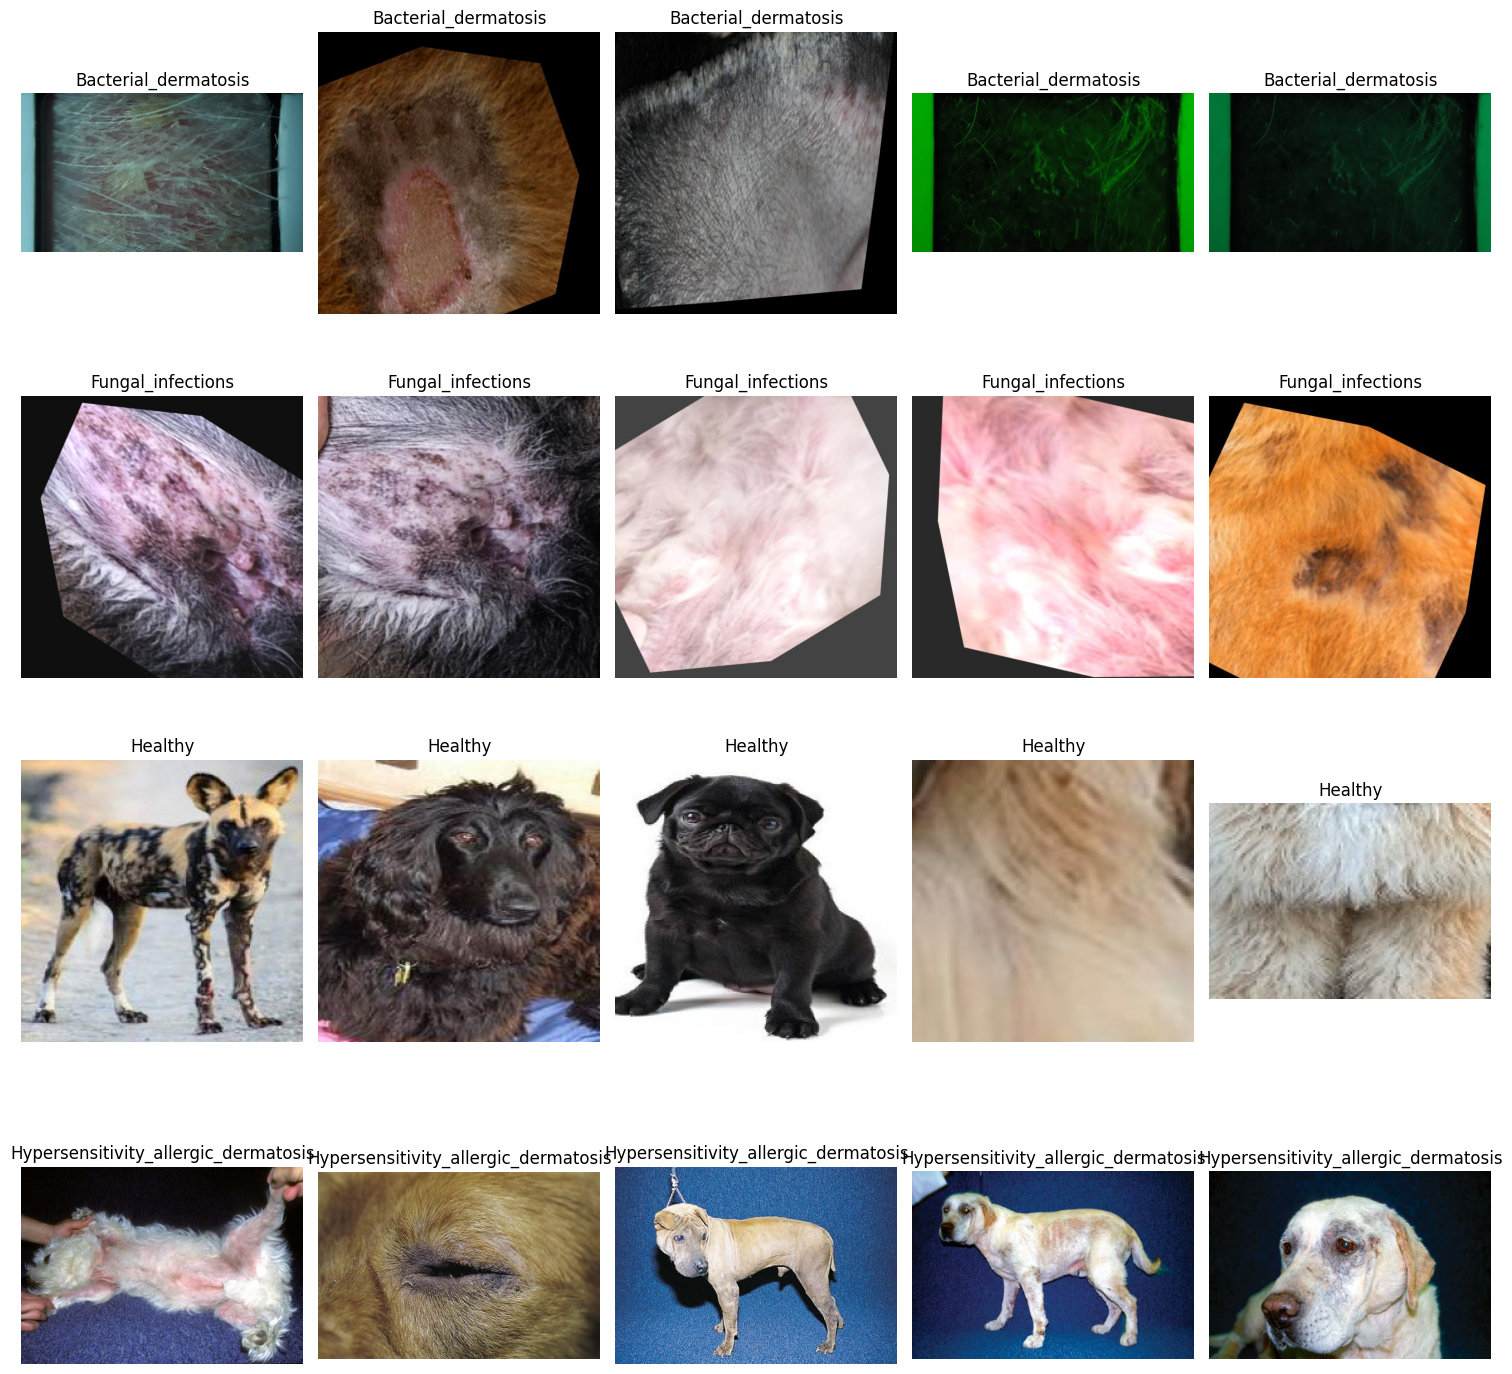

In [8]:
# Set up a plot to display the images
num_images_per_class = 5  # Show 5 images per class
fig, axes = plt.subplots(nrows=len(folders), ncols=num_images_per_class, figsize=(15, 15))

# Loop through each class and display 5 images in a row
for i, folder in enumerate(folders):
    # Filter images of the current class
    class_images = df_images[df_images['class'] == folder].head(num_images_per_class)

    for j, (image_path, label) in enumerate(zip(class_images['image_path'], class_images['class'])):
        img = Image.open(image_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(label)

plt.tight_layout()
plt.show() ## allows printing of images


## Exploratory Data analysis ( EDA)

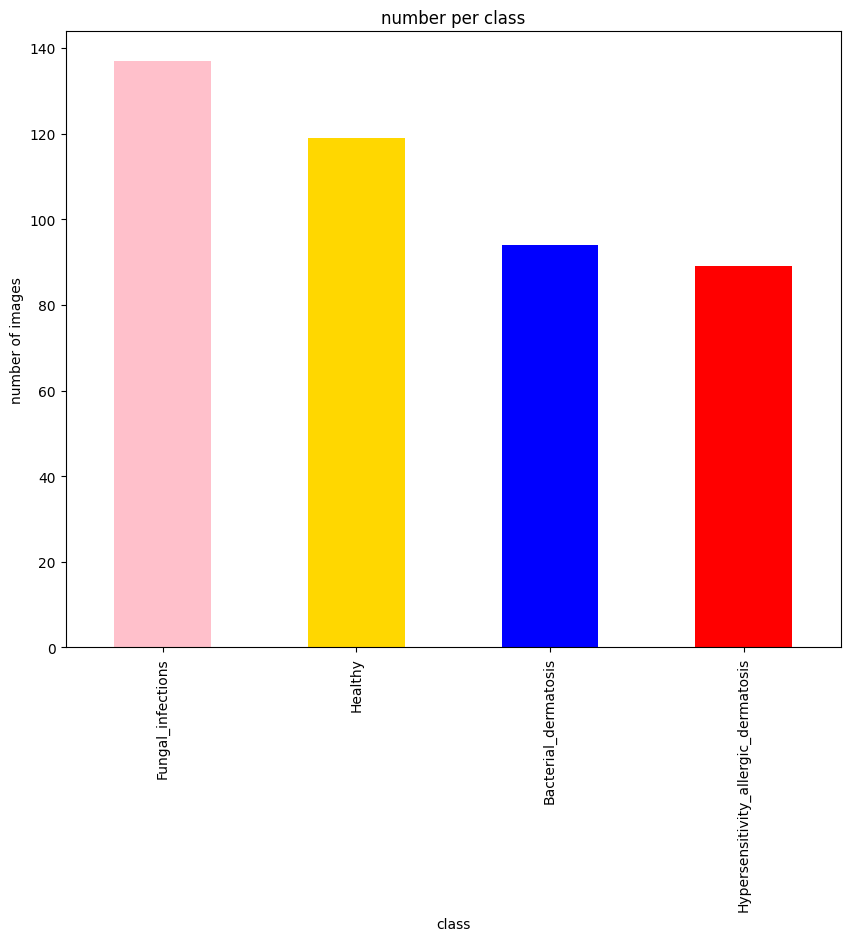

In [9]:
## list  and store image path and their corresponding classes
images_path =[]
images_classes=[]

## iterate through each folders and collect images path
for folder in folders:
  folder_path= os.path.join(base_dir, folder)
  for filename in os.listdir(folder_path):

   if filename.endswith(('.png','.jpg','.jpeg')):
    ## give access to any of this file that ends with jpeg, jpg, png
    images_path.append(os.path.join(folder_path, filename))
    images_classes.append(folder)

## creating a dataframe
df_images= pd.DataFrame({
      'image_path': images_path,
      'class':images_classes
  })

## visualization of bar chart

colors= ['pink','gold','blue','red']
plt.figure (figsize=(10,8))
df_images['class'].value_counts().plot(kind='bar',color=colors)
plt.title('number per class')
plt.xlabel('class')
plt.ylabel('number of images')
plt.show()

Text(0.5, 1.0, 'number per class')

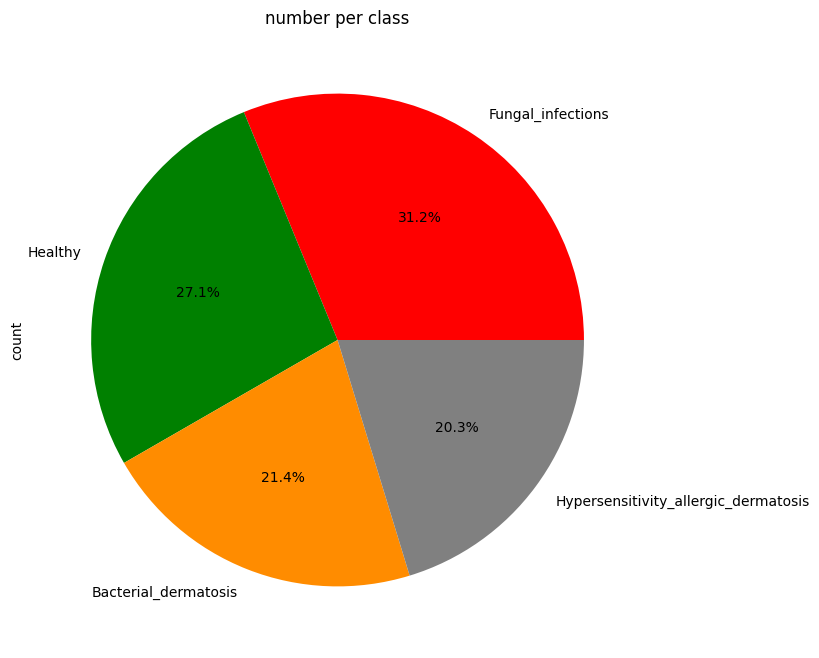

In [10]:
colors=['red','green','darkorange','grey']
plt.figure(figsize=(10,8))
df_images['class'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=colors)
plt.title('number per class')

# Data Pre-processing

In [11]:


# List to store image paths and their corresponding classes
image_paths = []
image_classes = []

# Iterate through each folder and collect image paths
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Adjust if necessary for different image formats
            image_paths.append(os.path.join(folder_path, filename))
            image_classes.append(folder)

# Create a DataFrame
df_images = pd.DataFrame({
    'image_path': image_paths,
    'class': image_classes
})

In [12]:
# Step 1: Split dataset into training, validation, and test sets
train_df, test_df = train_test_split(df_images, test_size=0.2, stratify=df_images['class'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['class'], random_state=42)


In [13]:
# Step 2: Image Preprocessing - Resize and Normalize
def preprocess_image(image_path, target_size=(224, 224)):
    """Load, resize, and normalize the image."""
    img = Image.open(image_path)
    img = img.resize(target_size)  # Resize the image
    img_array = np.array(img) / 255.0  # Normalize the pixel values to [0, 1]
    return img_array


In [14]:

from PIL import Image

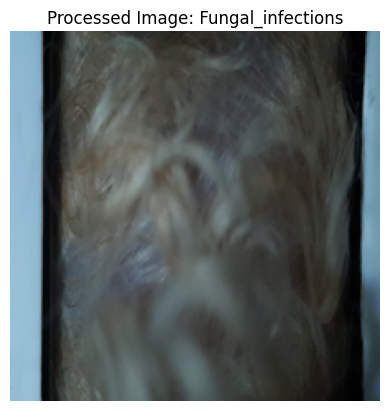

In [15]:
# Step 2: Image Preprocessing - Resize and Normalize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    """Load, resize, and normalize the image."""
    img = Image.open(image_path)
    img = img.resize(target_size)  # Resize the image
    img_array = np.array(img) / 255.0  # Normalize the pixel values to [0, 1]
    return img_array

# Preprocess images for a sample
sample_img = preprocess_image(train_df['image_path'].iloc[0])
plt.imshow(sample_img)
plt.title(f"Processed Image: {train_df['class'].iloc[0]}")
plt.axis('off')
plt.show()

## mobile net v2 model

In [20]:

# Step 1: Create ImageDataGenerators for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation data
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test data

# Step 2: Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='class',
    target_size=(224, 224),  # Adjust if necessary
    batch_size=32,  # Adjust if necessary
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle test data
)


# Step 3: Load Pretrained Base Model (MobileNetV2 as an example)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Output layer for multi-class classification

# Define the complete model
model = Model(inputs=base_model.input, outputs=x)

model.summary()

Found 280 validated image filenames belonging to 4 classes.
Found 71 validated image filenames belonging to 4 classes.
Found 88 validated image filenames belonging to 4 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [21]:
# Step 4: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [22]:
# Step 5: Train the Model with Data Augmentation
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.2740 - loss: 1.6486 - val_accuracy: 0.5070 - val_loss: 1.2648
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.4013 - loss: 1.3821 - val_accuracy: 0.4507 - val_loss: 1.2008
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4575 - loss: 1.2785 - val_accuracy: 0.4930 - val_loss: 1.1887
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5067 - loss: 1.1109 - val_accuracy: 0.4789 - val_loss: 1.1780
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5992 - loss: 0.9576 - val_accuracy: 0.4648 - val_loss: 1.1694
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6277 - loss: 0.9072 - val_accuracy: 0.4507 - val_loss: 1.1802
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5938 - loss: 0.8839 - val_accuracy: 0.4648 - val_loss: 1.1838
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6570 - loss: 0.8440 - val_accuracy: 0.4648 - val_loss: 1.1771
Epoch 9/

In [27]:
# Step 6: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")



3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4780 - loss: 1.0527
Test Accuracy: 53.41%


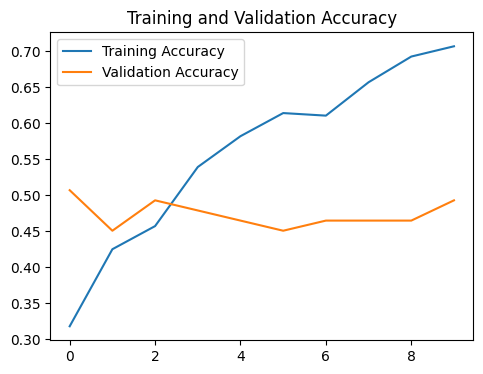

In [25]:
# Step 7: Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()



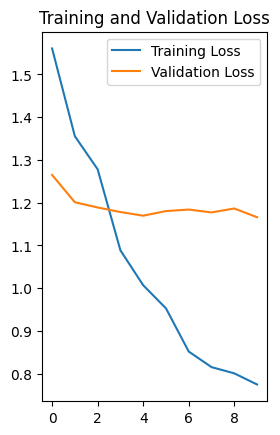

In [26]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step
Classification Report:
                                       precision    recall  f1-score   support

                Bacterial_dermatosis       0.55      0.32      0.40        19
                   Fungal_infections       0.46      0.41      0.43        27
                             Healthy       0.59      0.96      0.73        24
Hypersensitivity_allergic_dermatosis       0.50      0.39      0.44        18

                            accuracy                           0.53        88
                           macro avg       0.52      0.52      0.50        88
                        weighted avg       0.52      0.53      0.51        88



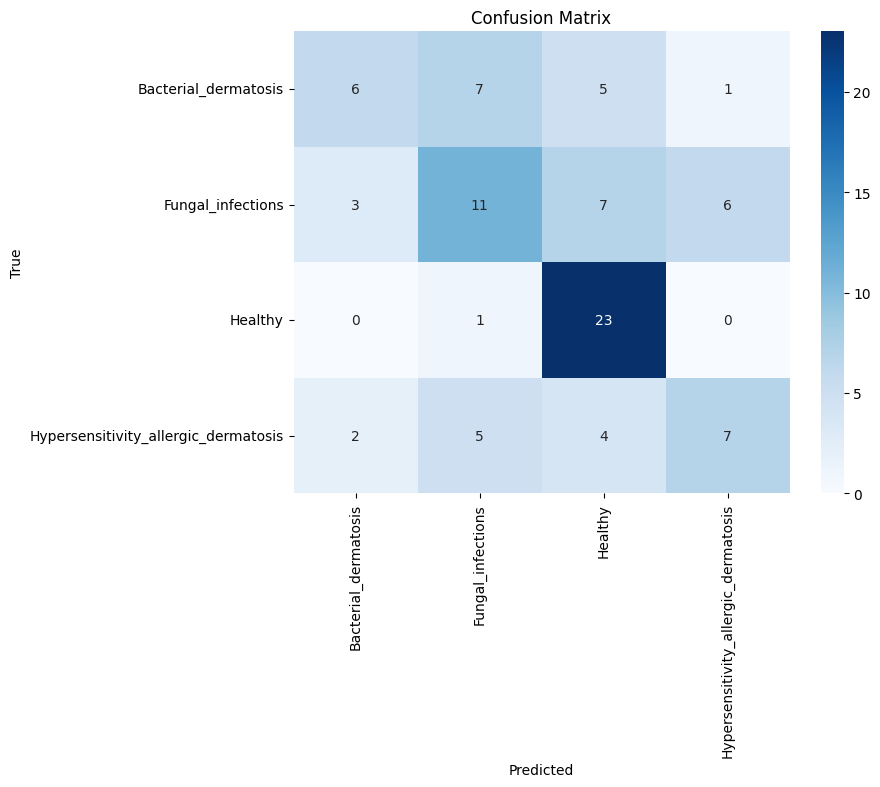

In [28]:

# Step 1: Make predictions on the test dataset
test_generator.reset()  # Reset the generator to ensure it starts from the beginning
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices

# Step 2: Get the true labels from the test dataset
y_true = test_generator.classes  # True class labels

# Step 3: Generate the Classification Report
target_names = test_generator.class_indices.keys()  # Class labels
report = classification_report(y_true, y_pred_classes, target_names=target_names)
print("Classification Report:\n", report)

# Step 4: Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
